# Book Character Network Analysis

Consider “Les Miserables” dataset consisting of network coappearance of characters that occur in the same chapter of Victor Hugo’s novel “Les miserables” and where the weights of the edges correspond to the number of such coappearances.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
from networkx.algorithms import community
from community import community_louvain
#%matplotlib agg

1. Read `lesmis.gml` file and use NetworkX to display the corresponding network, suggest appropriate simple labelling of the nodes to maintain the readability of the network graph as clear as possible. Save the adjacency matrix of this graph in a separate file.

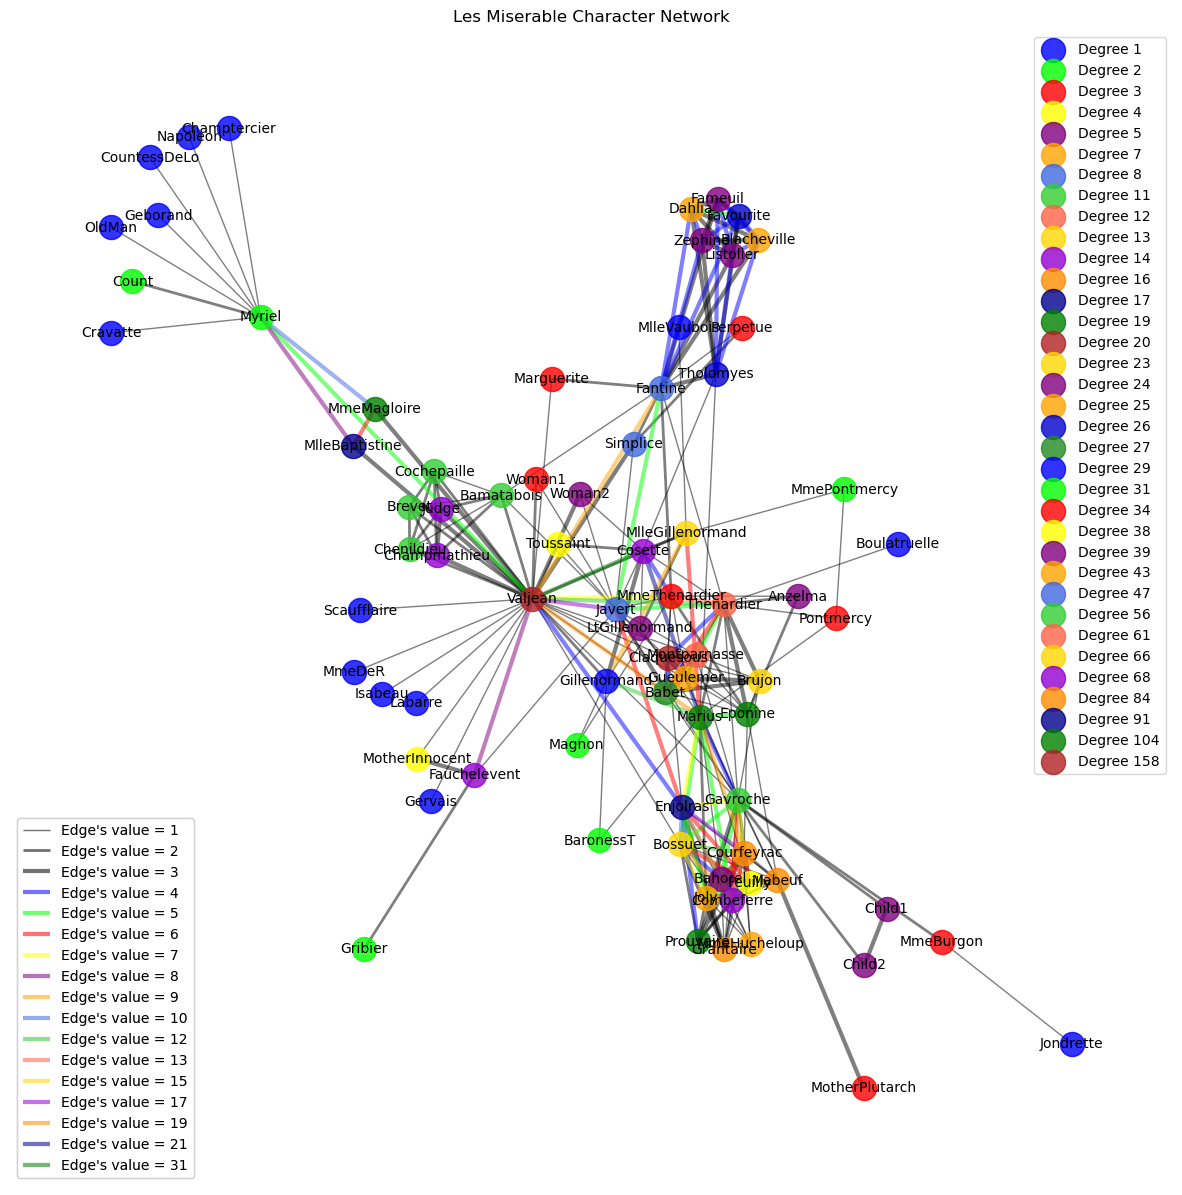

Adjacency matrix is saved to adjacency_matrix.txt


In [2]:
def read_network(file):
    # Read the graph from .gml file
    graph = nx.read_gml(file)
    return graph

# Define function which group nodes based on their degree
def classify_nodes(graph):
    node_degree = graph.degree(weight='value')
    degree_groups = {}
    for (node, degree) in node_degree:
        if degree not in degree_groups:
            degree_groups[degree] = []
        degree_groups[degree].append(node)
    # Sort the degree groups dictionary based on their degrees
    degree_groups = dict(sorted(degree_groups.items()))
    return degree_groups

# Define function which classify the edges into groups based on their weight
def classify_edges(graph):
    edge_groups = {}
    for u, v, d in graph.edges(data=True):
        edge_weight = d['value']
        if edge_weight not in edge_groups:
            edge_groups[edge_weight] = []
        edge_groups[edge_weight].append((u, v))
    # Sort the edge groups dictionary based on their values
    edge_groups = dict(sorted(edge_groups.items()))
    return edge_groups

# Define function which draw the network in a easily readable way
def group_visualization(graph, node_groups, graph_title, group_name):
    # Define a list of colors for communities
    colors = ['#0000FF', '#00FF00', '#FF0000', '#FFFF00', '#800080', '#FFA500', '#4169E1', '#32CD32', '#FF6347', '#FFD700', '#9400D3', '#FF8C00', 
                 '#00008B', '#008000', '#B22222', '#FFD700', '#800080', '#FFA500', '#0000CD', '#228B22']
    # Classify edges based on their values
    edge_groups = classify_edges(graph)
    # Draw graph
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(graph, seed=42)
    # Draw colorful nodes based on their groups
    i_node = 0
    for key, node_list in node_groups.items():
        nx.draw_networkx_nodes(graph, pos, nodelist=node_list, node_color=colors[i_node % len(colors)],
                                  node_size=300, alpha=0.8, label=f"{group_name} {key}")
        i_node += 1
    # Draw edges based on their values
    i_edge = 0
    for key, edge_list in edge_groups.items():
        if key <= 3:
            nx.draw_networkx_edges(graph, pos, edgelist=edge_list, width=key, edge_color="black", 
                                   alpha=0.5, label=f"Edge's value = {key}")
        else:
            nx.draw_networkx_edges(graph, pos, edgelist=edge_list, width=3, edge_color=colors[i_edge % len(colors)], 
                                   alpha=0.5, label=f"Edge's value = {key}")
            i_edge += 1
    nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black')
    plt.title(graph_title)
    # Create legend for node labels and adjust position
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_nodes = plt.legend(handles[:len(node_groups)], labels[:len(node_groups)], loc='upper right', bbox_to_anchor=(1, 1))
    # Create legend for edge labels and adjust position
    legend_edges = plt.legend(handles[len(node_groups):], labels[len(node_groups):], loc='lower left', bbox_to_anchor=(0, 0))
    plt.gca().add_artist(legend_nodes)
    plt.gca().add_artist(legend_edges)
    plt.axis('off')
    #plt.savefig('LesMisNetworkCommunity.png')
    plt.show()
    
# Define the function for calculating the adjacency matrix of the graph
def adjacency_matrix(graph, file_name):
    nodes = sorted(graph.nodes())
    adj_matrix = np.zeros((len(nodes), len(nodes)))
    for u, v, d in graph.edges(data=True):
        u_idx = nodes.index(u)
        v_idx = nodes.index(v)
        weight = d['value']
        adj_matrix[u_idx][v_idx] = weight
    np.savetxt(file_name, adj_matrix, fmt='%d')
    print(f"Adjacency matrix is saved to {file_name}")
# Read network in lesmis.gml file and create graph
lesmis_graph = read_network('lesmis.gml')
# Group the nodes based on their degrees
degree_groups = classify_nodes(lesmis_graph)
# Draw graph in easily readable way
group_visualization(lesmis_graph, degree_groups, "Les Miserable Character Network", "Degree")
# Create and Save the adjacency matrix of the network in a separate .txt file
adjacency_matrix(lesmis_graph, "adjacency_matrix.txt")

2.  Write a script that uses NetworkX functions to calculate the diameter, global clustering coefficient, average distance in the graph, smallest and largest component.

In [3]:
def calculate_metrics(graph, to_print=True):
    diameter = nx.diameter(graph, weight='value')
    global_clustering_coefficient = nx.average_clustering(graph, weight='value')
    average_distance = nx.average_shortest_path_length(graph, weight='value')
    smallest_component = len(min(nx.connected_components(graph), key=len))
    largest_component = len(max(nx.connected_components(graph), key=len))
    if to_print == True:
        print(f"Diameter: {diameter}")
        print(f"Global Clustering Coefficient: {global_clustering_coefficient}")
        print(f"Average Distance: {average_distance}")
        print(f"Smallest Component: {smallest_component}")
        print(f"Largest Component: {largest_component}")
    return diameter, global_clustering_coefficient
_, _ = calculate_metrics(lesmis_graph)

Diameter: 14
Global Clustering Coefficient: 0.05502699314742024
Average Distance: 4.861244019138756
Smallest Component: 77
Largest Component: 77


3. Suggest a script that uses NetworkX functions to identify the nodes (characters) of the three highest degree centrality, three highest closeness centrality and three highest betweenness centrality.  

In [4]:
def calculate_centrality(graph):
    # Degree centrality
    node_degree = nx.degree(graph, weight='value')
    degree_centrality = {}
    num_nodes = len(graph)
    for (node, degree) in node_degree:
        node_dc = degree / (num_nodes - 1)
        degree_centrality[node] = node_dc
    closeness_centrality = nx.closeness_centrality(graph, distance='value')
    betweenness_centrality = nx.betweenness_centrality(graph, weight='value')
    return degree_centrality, closeness_centrality, betweenness_centrality
def top3_centrality(degree_centrality, closeness_centrality, betweenness_centrality):
    degree_top3 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    closeness_top3 = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    betweenness_top3 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"Top 3 Degree Centrality: {degree_top3}")
    print(f"Top 3 Closeness Centrality: {closeness_top3}")
    print(f"Top 3 Betweenness Centrality: {betweenness_top3}")
degree_centrality, closeness_centrality, betweenness_centrality = calculate_centrality(lesmis_graph)
top3_centrality(degree_centrality, closeness_centrality, betweenness_centrality)

Top 3 Degree Centrality: [('Valjean', 2.0789473684210527), ('Marius', 1.368421052631579), ('Enjolras', 1.1973684210526316)]
Top 3 Closeness Centrality: [('Gavroche', 0.3318777292576419), ('Valjean', 0.32340425531914896), ('Montparnasse', 0.3089430894308943)]
Top 3 Betweenness Centrality: [('Valjean', 0.45389967342598925), ('Gavroche', 0.28515261006050474), ('Javert', 0.1934002556897294)]


4. Write a script that plots the degree centrality distribution, closeness centrality distribution and betweenness centrality distribution.

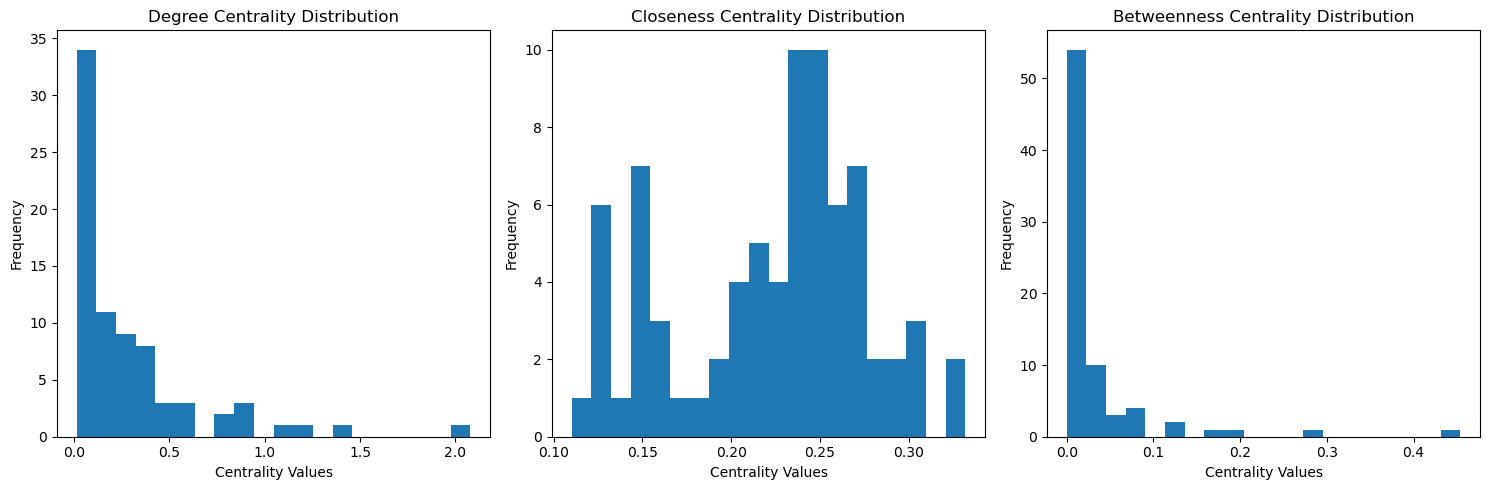

In [5]:
# Define function for changing centrality dictionaries to lists
def list_centrality(degree_centrality, closeness_centrality, betweenness_centrality):
    degree_list = list(degree_centrality.values())
    closeness_list = list(closeness_centrality.values())
    betweenness_list = list(betweenness_centrality.values())
    return degree_list, closeness_list, betweenness_list
# Define function for plot the centralities distributions
def centrality_histogram(degree, closeness, betweenness):
    # Change the centralities dictonaries obtained from input to list 
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # Plot degree centrality distribution
    axs[0].hist(degree, bins=20)
    axs[0].set_title("Degree Centrality Distribution")
    axs[0].set_xlabel("Centrality Values")
    axs[0].set_ylabel("Frequency")
    # Plot closeness centrality distribution
    axs[1].hist(closeness, bins=20)
    axs[1].set_title("Closeness Centrality Distribution")
    axs[1].set_xlabel("Centrality Values")
    axs[1].set_ylabel("Frequency")
    # Plot betweenness centrality distribution
    axs[2].hist(betweenness, bins=20)
    axs[2].set_title("Betweenness Centrality Distribution")
    axs[2].set_xlabel("Centrality Values")
    axs[2].set_ylabel("Frequency")
    plt.tight_layout()
    #plt.show()
    plt.savefig('CentralityDistributionPlot1.png')
degree_list, closeness_list, betweenness_list = list_centrality(degree_centrality, closeness_centrality, betweenness_centrality)
centrality_histogram(degree_list, closeness_list, betweenness_list)

5. We want to test the extent to which the centrality distributions in 3) fit a power law distribution. You may inspire from the implementation in powerlaw · PyPI  of the power-law distribution, or can use alternative one of your choice. It is important to quantify the goodness of fit using p-value. Typically, when p-value is greater than 10%, we can state that power-law is a plausible fit to the (distribution) data. 

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
No valid fits found.


Degree centrality's p_value: 0.009633141303097836
Degree centrality does NOT fit the power_law distribution
Closeness centrality's p_value: 0.0
Closeness centrality does NOT fit the power_law distribution
Betweenness centrality's p_value: 0.0
Betweenness centrality does NOT fit the power_law distribution


No valid fits found.


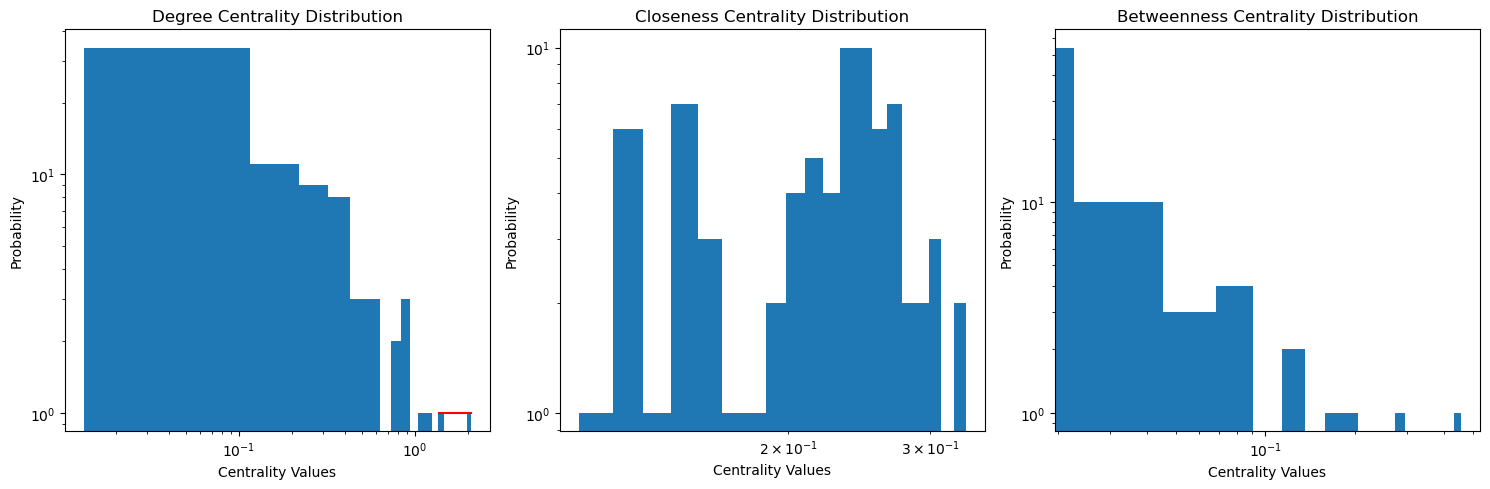

In [7]:
def fit_powerlaw(data):
    filtered_data = []
    # Remove zero values from the data
    for x in data:
        if x > 0:
            filtered_data.append(x)
    # Check if the data list are empty
    if len(filtered_data) == 0:
        return np.nan
    fit = powerlaw.Fit(filtered_data, discrete=True)
    return fit
def centrality_powerlaw_plot(degree, closeness, betweenness, fit_degree, fit_closeness, fit_betweenness):
    # Change the centralities dictonaries obtained from input to list 
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # Plot degree centrality distribution
    axs[0].hist(degree, bins=20)
    fit_degree.lognormal.plot_pdf(color='r', ax=axs[0], label='Power Law Fit')
    axs[0].set_title("Degree Centrality Distribution")
    axs[0].set_xlabel("Centrality Values")
    axs[0].set_ylabel("Probability")
    # Plot closeness centrality distribution
    axs[1].hist(closeness, bins=20)
    fit_closeness.lognormal.plot_pdf(color='r', linewidth=2, ax=axs[1], label='Power Law Fit')
    axs[1].set_title("Closeness Centrality Distribution")
    axs[1].set_xlabel("Centrality Values")
    axs[1].set_ylabel("Probability")
    # Plot betweenness centrality distribution
    axs[2].hist(betweenness, bins=20)
    fit_betweenness.lognormal.plot_pdf(color='r', linewidth=2, ax=axs[2], label='Power Law Fit')
    axs[2].set_title("Betweenness Centrality Distribution")
    axs[2].set_xlabel("Centrality Values")
    axs[2].set_ylabel("Probability")
    plt.tight_layout()
    plt.show()
    #plt.savefig('CentralityDistributionPlot1.png')
def quantify_powerlaw(fit, value_title, powerlaw_type, comparing_pattern):
    p_value = fit.distribution_compare(powerlaw_type, comparing_pattern)[1]
    print(f"{value_title}'s p_value: {p_value}")
    if p_value > 0.1:
        print(f"{value_title} fits the {powerlaw_type} distribution.")
    else:
        print(f"{value_title} does NOT fit the {powerlaw_type} distribution")
fit_degree = fit_powerlaw(degree_list)
fit_closeness = fit_powerlaw(closeness_list)
fit_betweenness = fit_powerlaw(betweenness_list)
quantify_powerlaw(fit_degree, "Degree centrality", "power_law", "lognormal_positive")
quantify_powerlaw(fit_closeness, "Closeness centrality", "power_law", "lognormal_positive")
quantify_powerlaw(fit_betweenness, "Betweenness centrality", "power_law", "lognormal_positive")
centrality_powerlaw_plot(degree_list, closeness_list, betweenness_list, fit_degree, fit_closeness, fit_betweenness)

6. We want to use exponentially truncated power-law instead of power law distribution. Suggest a script that quantifies the goodness of fit for degree-centrality, closeness centrality and betweenness centrality distributions. 

Degree centrality's p_value: 0.3522572468376327
Degree centrality fits the truncated_power_law distribution.
Closeness centrality's p_value: 1.7667662751040216e-103
Closeness centrality does NOT fit the truncated_power_law distribution
Betweenness centrality's p_value: 0.1883471324521
Betweenness centrality fits the truncated_power_law distribution.


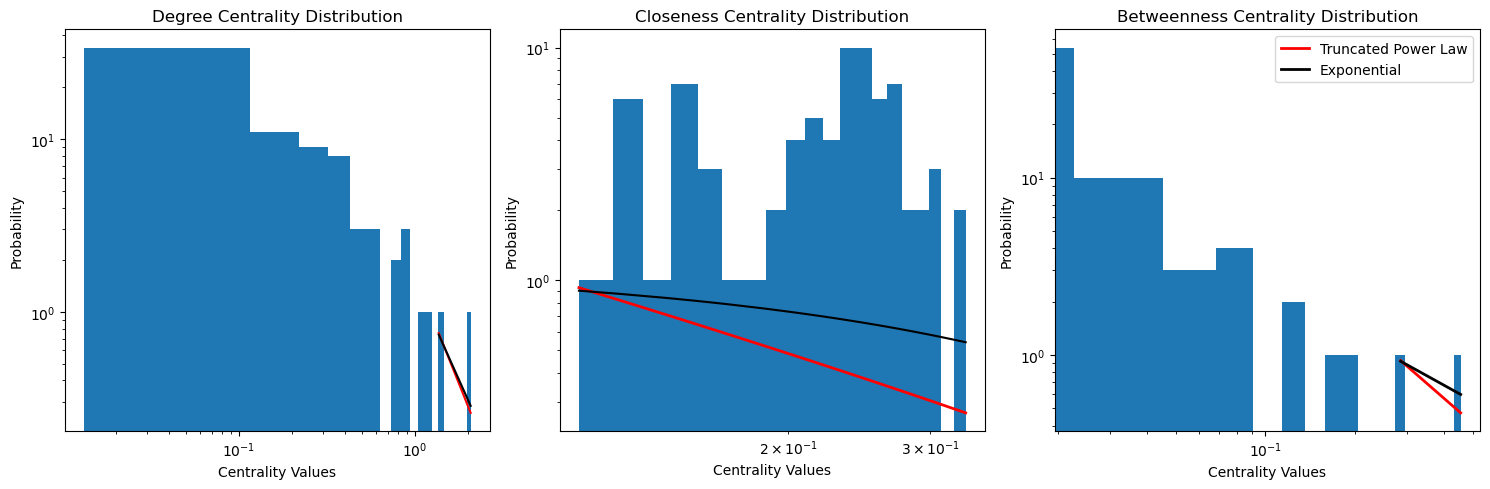

In [8]:
def centrality_truncated_powerlaw_plot(degree, closeness, betweenness, fit_degree, fit_closeness, fit_betweenness):
    # Change the centralities dictonaries obtained from input to list 
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    # Plot degree centrality distribution
    axs[0].hist(degree, bins=20)
    fit_degree.truncated_power_law.plot_pdf(color='r', ax=axs[0], label='Truncated Power Law')
    fit_degree.exponential.plot_pdf(color='k', ax=axs[0], label='Exponential')
    axs[0].set_title("Degree Centrality Distribution")
    axs[0].set_xlabel("Centrality Values")
    axs[0].set_ylabel("Probability")
    # Plot closeness centrality distribution
    axs[1].hist(closeness, bins=20)
    fit_closeness.truncated_power_law.plot_pdf(color='r', linewidth=2, ax=axs[1], label='Truncated Power law')
    fit_closeness.exponential.plot_pdf(color='k', ax=axs[1], label='Exponential')
    axs[1].set_title("Closeness Centrality Distribution")
    axs[1].set_xlabel("Centrality Values")
    axs[1].set_ylabel("Probability")
    # Plot betweenness centrality distribution
    axs[2].hist(betweenness, bins=20)
    fit_betweenness.truncated_power_law.plot_pdf(color='r', linewidth=2, ax=axs[2], label='Truncated Power Law')
    fit_betweenness.exponential.plot_pdf(color='k', ax=axs[2], linewidth=2, label='Exponential')
    axs[2].set_title("Betweenness Centrality Distribution")
    axs[2].set_xlabel("Centrality Values")
    axs[2].set_ylabel("Probability")
    plt.tight_layout()
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.show()
quantify_powerlaw(fit_degree, "Degree centrality", "truncated_power_law", "exponential")
quantify_powerlaw(fit_closeness, "Closeness centrality", "truncated_power_law", "exponential")
quantify_powerlaw(fit_betweenness, "Betweenness centrality", "truncated_power_law", "exponential")
centrality_truncated_powerlaw_plot(degree_list, closeness_list, betweenness_list, fit_degree, fit_closeness, fit_betweenness)

7. We want to identify relevant communities from the network graph. For this purpose, use Louvain algorithm implementation in NetworkX to identify the main communities. Write a script that uses different color for each community and visualize the above graph with the detected communities. Use the appropriate function in NetworkX to compute the separation among the various communities and any other related quality measures. 

Communities {1: ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan'], 2: ['Jondrette', 'MmeBurgon', 'Gavroche', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Child1', 'Child2', 'MmeHucheloup'], 3: ['Marguerite', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'Perpetue', 'Simplice'], 4: ['MmeThenardier', 'Thenardier', 'Boulatruelle', 'Eponine', 'Anzelma', 'Magnon', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon'], 5: ['Labarre', 'Valjean', 'MmeDeR', 'Isabeau', 'Gervais', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Woman2', 'MotherInnocent', 'Gribier', 'Gillenormand', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'Barone

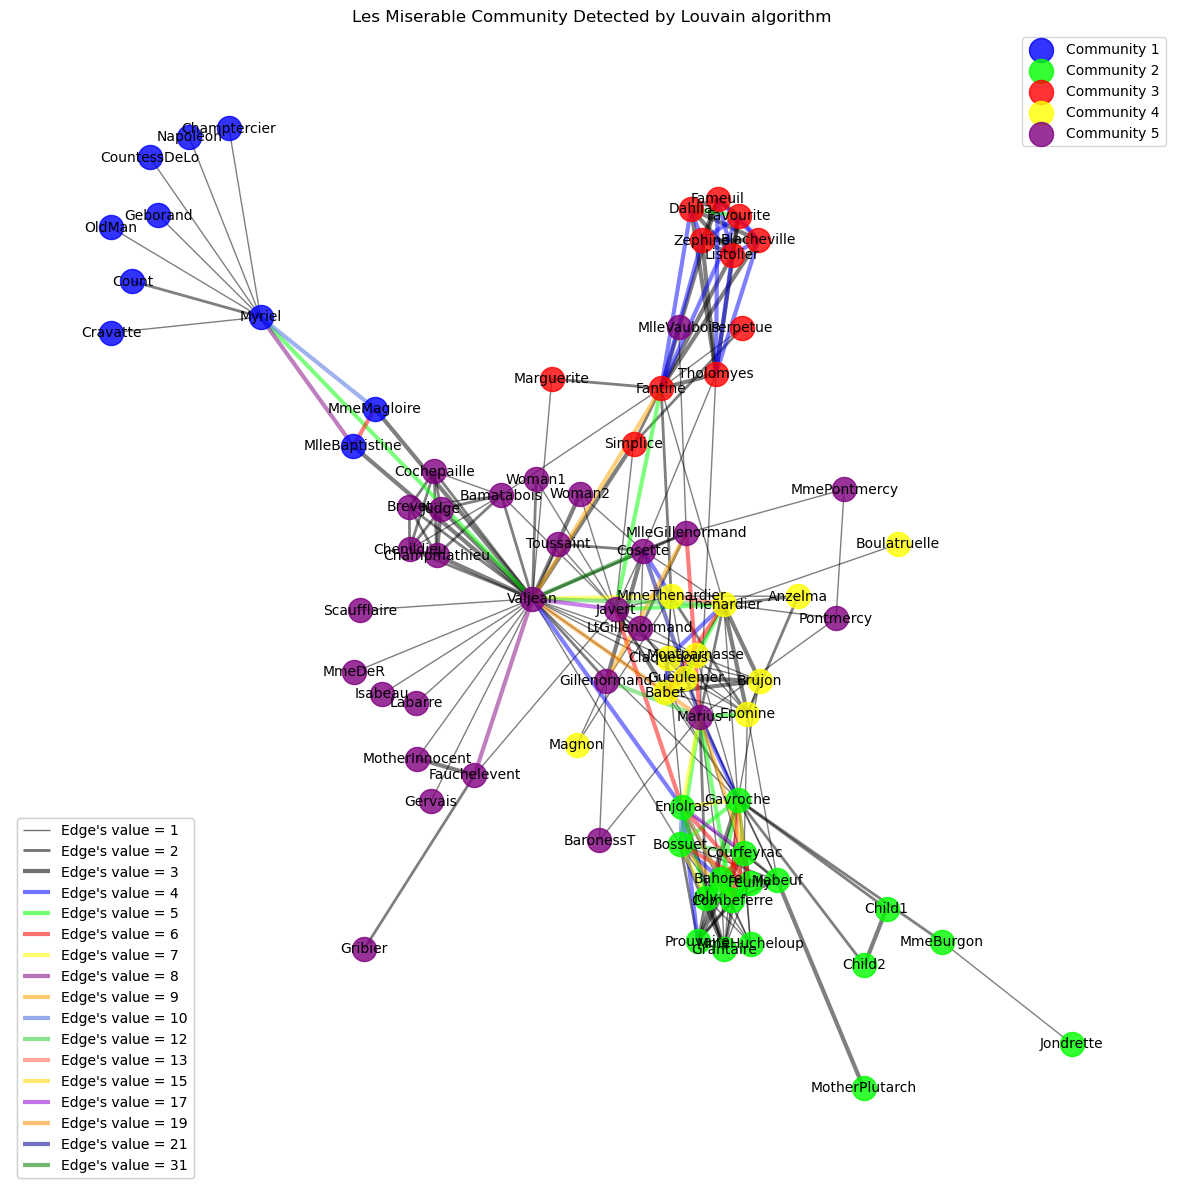

Louvain modularity: 0.5367118234236468
Louvain performance: 0.8219412166780588


In [9]:
# Define function for partitioning network into community using Louvain algorithm
def louvain_community(graph):
    partition = community_louvain.best_partition(graph, weight='value')
    node_groups = {}
    for node, group in partition.items():
        if group + 1 not in node_groups:
            node_groups[group + 1] = []
        node_groups[group + 1].append(node)
    node_groups = dict(sorted(node_groups.items()))
    max_community = max(partition.values())
    communities = [[] for _ in range(max_community + 1)]
    for node, a_community in partition.items():
        communities[a_community].append(node)
    print(f"Communities {node_groups}")
    return node_groups, communities
louvain_communities, evaluated_communities = louvain_community(lesmis_graph)
group_visualization(lesmis_graph, louvain_communities, "Les Miserable Community Detected by Louvain algorithm", "Community")
louvain_modularity = community.modularity(lesmis_graph, evaluated_communities)
print(f"Louvain modularity: {louvain_modularity}")
_, louvain_performance = community.partition_quality(lesmis_graph, evaluated_communities)
print(f"Louvain performance: {louvain_performance}")

From my knowledge of the novel Les Miserables, the communities classified by the Louvain algorithm are highly accurate. The characters within these communities share relationships with specific topics in the novel. These topics are as follows:

1. **Epoch-setting Community**: `'Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan'`: This community reflects characters associated with the broader historical context and epoch in which the novel is set, encompassing themes of political upheaval, social inequality, and economic hardship.

2. **Cosette's Circle Community**: `'Labarre', 'Valjean', 'MmeDeR', 'Isabeau', 'Gervais', 'Cosette', 'Javert', 'Fauchelevent', 'Scaufflaire', 'Woman1', 'Pontmercy', 'Woman2', 'MotherInnocent', 'Gribier', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Toussaint'`: This community accurately captures characters involved in the storyline related to Cosette's life, including her upbringing by Valjean and interactions with other key figures in her circle.

3. **Thenardier' Crimimal Community**: `'MmeThenardier', 'Thenardier', 'Boulatruelle', 'Eponine', 'Anzelma', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon'`:  This community comprises characters associated with the Thenardiers and involved in various illicit activities.

4. **Revolutionary Vanguard Community**: `'Jondrette', 'MmeBurgon', 'Gavroche', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Child1', 'Child2', 'MmeHucheloup'`: This community accurately identifies characters deeply involved in the revolutionary movement depicted in the novel, playing significant roles in the events leading up to and during the June Rebellion.

5. **Valjean-Champmathieu trial community**: `'Bamatabois', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille'`: This community includes characters interconnected through their involvement in the trial scene where Champmathieu is mistaken for Valjean. They are associated with the legal intricacies and accusations surrounding Valjean.

6. **Fantine's Network Community**: `'Marguerite', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'Perpetue', 'Simplice'`: This community accurately reflects characters connected to Fantine's storyline, highlighting her interactions and relationships within the narrative and contributing to the exploration of themes related to her struggles and sacrifices.

8. We want to ignore the weighting imposed by the network, and we want to restrict to binary representation (either weight value 1 if there is cooccurrence of characters, zero otherwise). Provide the new adjacency matrix and save it in a file. Repeat questions 2-7) using the new adjacency matrix, and comment on the differences between the two cases (weighted and unweighted graph) accordingly.

Adjacency matrix is saved to binary_adjacency_matrix.txt
-------------------- Question 1 --------------------


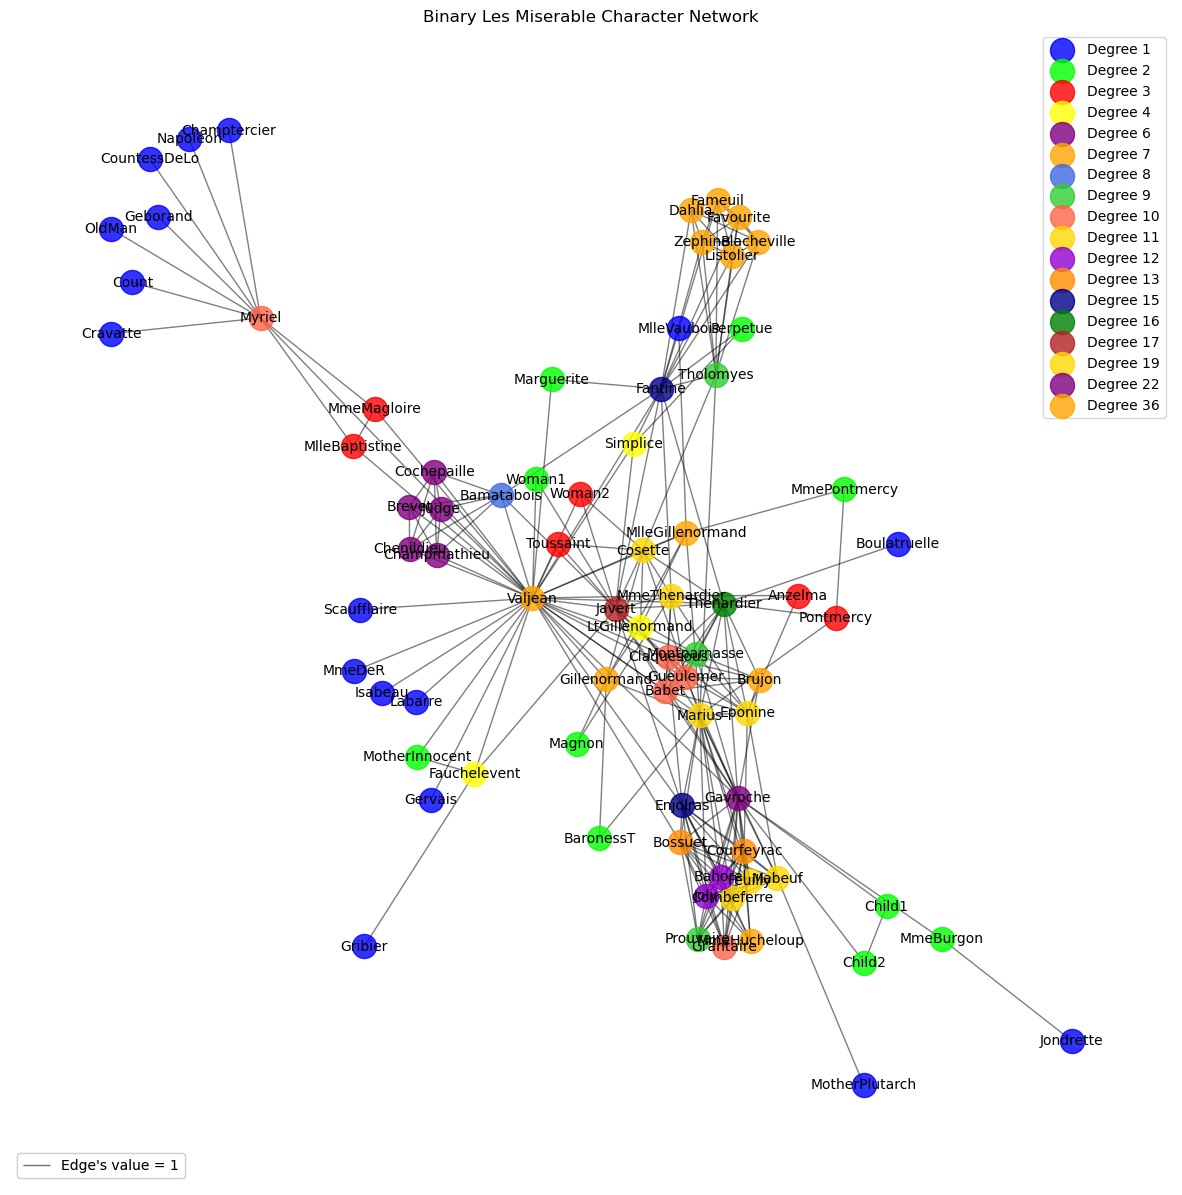

-------------------- Question 2 --------------------
Diameter: 5
Global Clustering Coefficient: 0.5731367499320134
Average Distance: 2.6411483253588517
Smallest Component: 77
Largest Component: 77
-------------------- Question 3 --------------------
Top 3 Degree Centrality: [('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25)]
Top 3 Closeness Centrality: [('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885)]
Top 3 Betweenness Centrality: [('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766)]
-------------------- Question 4 --------------------
-------------------- Question 5 --------------------
Degree centrality's p_value: 0.0
Degree centrality does NOT fit the power_law distribution
Closeness centrality's p_value: 0.0
Closeness centrality does NOT fit the power_law distribution
Betweenness centrality's p_value: 0.0
Betweenness centrality does NOT fit the powe

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
No valid fits found.
No valid fits found.
No valid fits found.


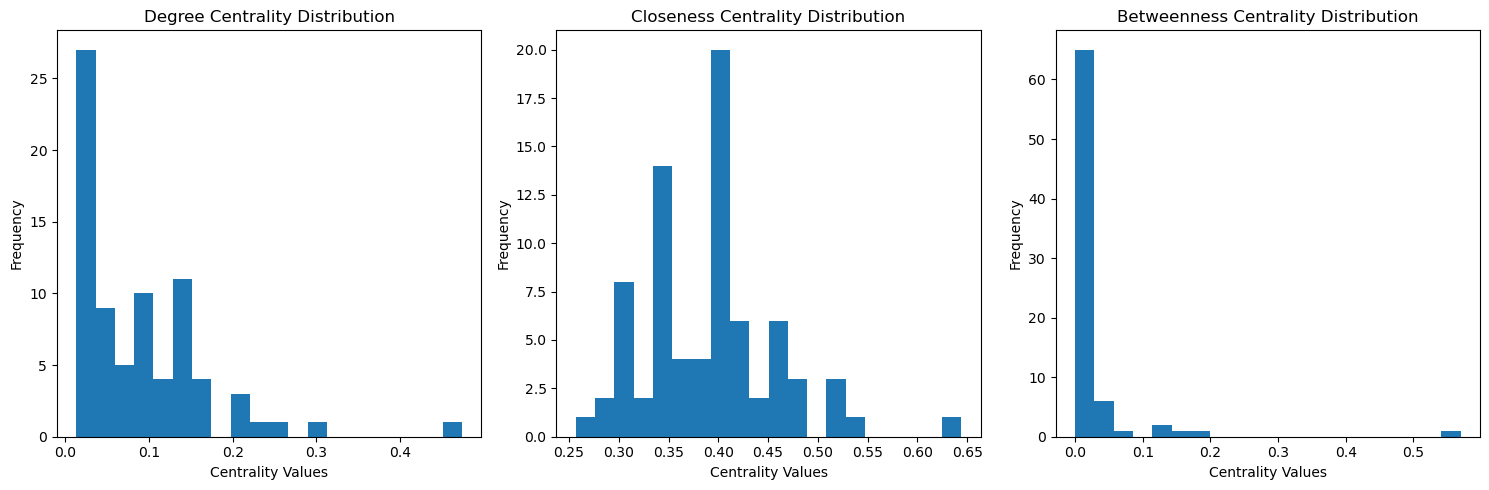

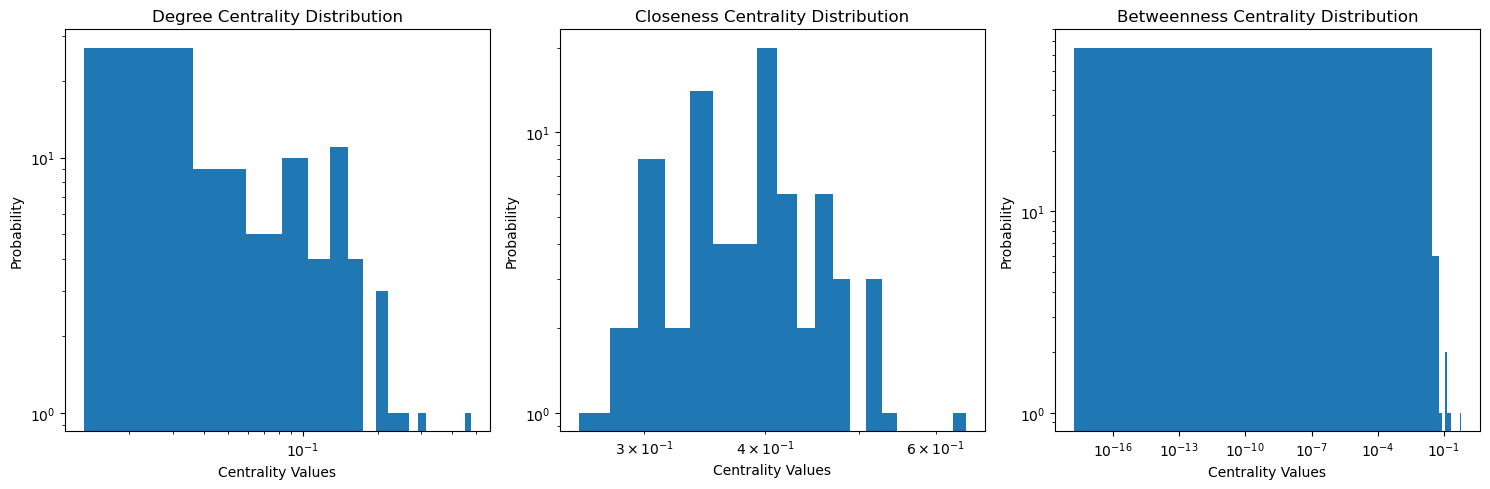

-------------------- Question 6 --------------------
Degree centrality's p_value: 0.3522572468376327
Degree centrality fits the truncated_power_law distribution.
Closeness centrality's p_value: 1.7667662751040216e-103
Closeness centrality does NOT fit the truncated_power_law distribution
Betweenness centrality's p_value: 0.1883471324521
Betweenness centrality fits the truncated_power_law distribution.


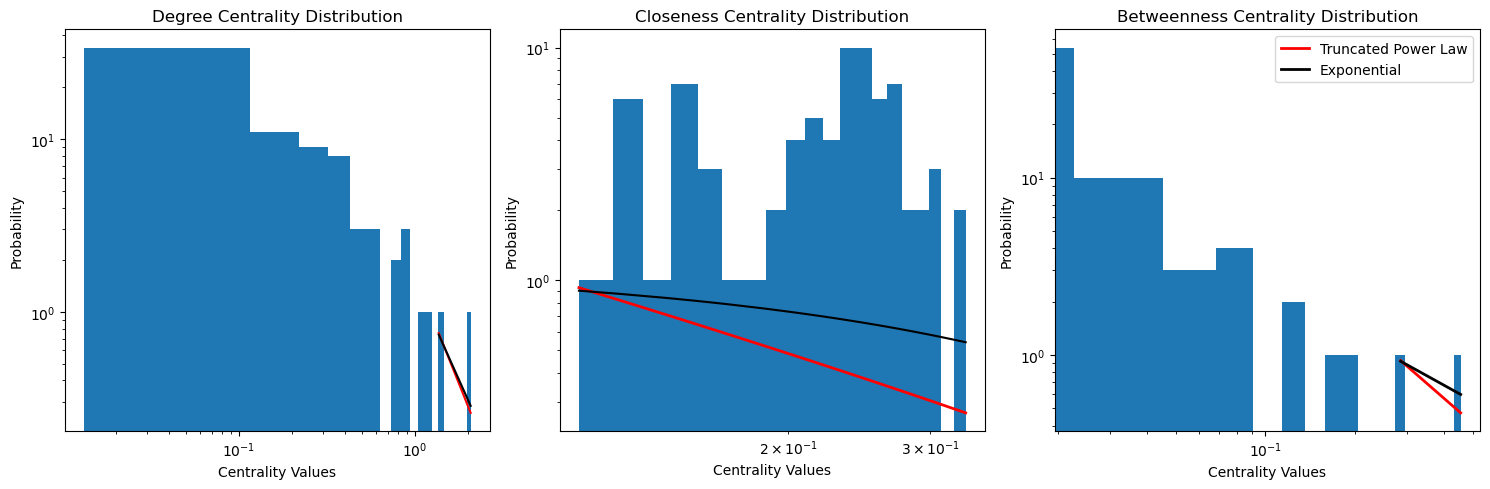

-------------------- Question 7 --------------------
Communities {1: ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan'], 2: ['Cosette', 'Pontmercy', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT'], 3: ['Jondrette', 'MmeBurgon', 'Gavroche', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Child1', 'Child2', 'MmeHucheloup'], 4: ['Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'Perpetue', 'Simplice'], 5: ['MmeThenardier', 'Thenardier', 'Javert', 'Boulatruelle', 'Eponine', 'Anzelma', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon'], 6: ['Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Fauchelevent', 'Bamatabois', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Che

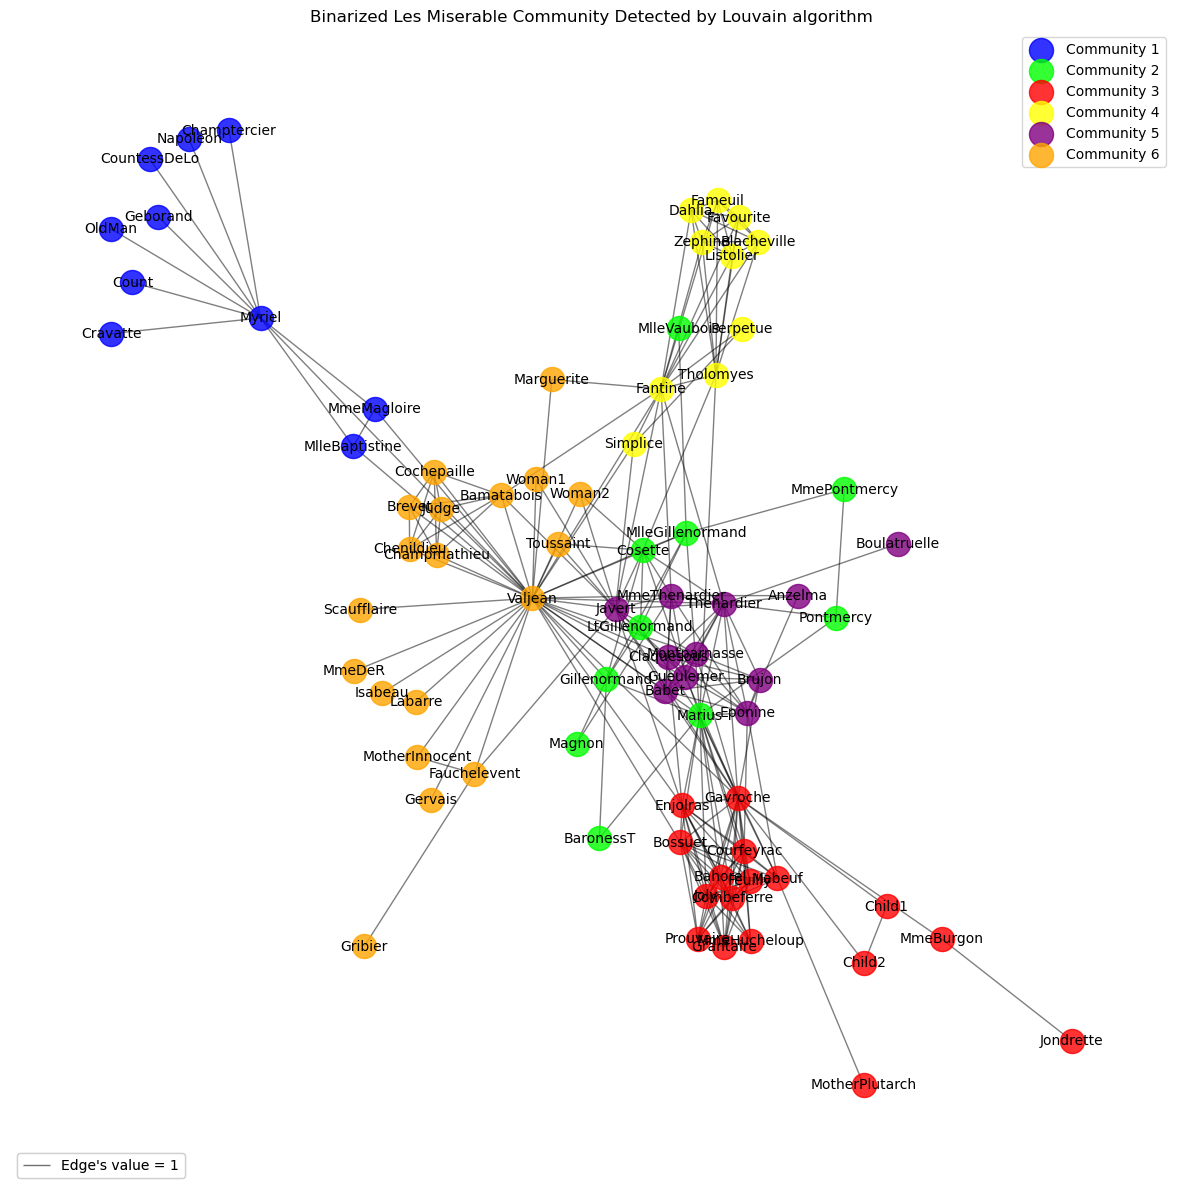

Louvain modularity: 0.5582723665447331
Louvain performance: 0.8759398496240601


In [10]:
def binarize_graph(graph):
    binary_graph = nx.Graph()
    binary_graph.add_nodes_from(graph.nodes())
    for u, v, data in graph.edges(data=True):
        binary_graph.add_edge(u, v, value=1)
    return binary_graph
binary_lesmis_graph = binarize_graph(lesmis_graph)
adjacency_matrix(binary_lesmis_graph, "binary_adjacency_matrix.txt")
# Question 1
print("-------------------- Question 1 --------------------")
degree_groups2 = classify_nodes(binary_lesmis_graph)
group_visualization(binary_lesmis_graph, degree_groups2, "Binary Les Miserable Character Network", "Degree")

# Question 2
print("-------------------- Question 2 --------------------")
_, _ = calculate_metrics(binary_lesmis_graph)
# Question 3
print("-------------------- Question 3 --------------------")
degree_centrality2, closeness_centrality2, betweenness_centrality2 = calculate_centrality(binary_lesmis_graph)
top3_centrality(degree_centrality2, closeness_centrality2, betweenness_centrality2)
# Question 4
print("-------------------- Question 4 --------------------")
degree_list2, closeness_list2, betweenness_list2 = list_centrality(degree_centrality2, closeness_centrality2, betweenness_centrality2)
centrality_histogram(degree_list2, closeness_list2, betweenness_list2)
# Question 5
print("-------------------- Question 5 --------------------")
fit_degree2 = fit_powerlaw(degree_list2)
fit_closeness2 = fit_powerlaw(closeness_list2)
fit_betweenness2 = fit_powerlaw(betweenness_list2)
quantify_powerlaw(fit_degree2, "Degree centrality", "power_law", "lognormal_positive")
quantify_powerlaw(fit_closeness2, "Closeness centrality", "power_law", "lognormal_positive")
quantify_powerlaw(fit_betweenness2, "Betweenness centrality", "power_law", "lognormal_positive")
centrality_powerlaw_plot(degree_list2, closeness_list2, betweenness_list2, fit_degree2, fit_closeness2, fit_betweenness2)
# Question 6
print("-------------------- Question 6 --------------------")
quantify_powerlaw(fit_degree, "Degree centrality", "truncated_power_law", "exponential")
quantify_powerlaw(fit_closeness, "Closeness centrality", "truncated_power_law", "exponential")
quantify_powerlaw(fit_betweenness, "Betweenness centrality", "truncated_power_law", "exponential")
centrality_truncated_powerlaw_plot(degree_list, closeness_list, betweenness_list, fit_degree, fit_closeness, fit_betweenness)
# Question 7
print("-------------------- Question 7 --------------------")
louvain_communities2, evaluated_communities2 = louvain_community(binary_lesmis_graph)
group_visualization(binary_lesmis_graph, louvain_communities2, "Binarized Les Miserable Community Detected by Louvain algorithm", "Community")
louvain_modularity2 = community.modularity(binary_lesmis_graph, evaluated_communities2)
print(f"Louvain modularity: {louvain_modularity2}")
_, louvain_performance2 = community.partition_quality(lesmis_graph, evaluated_communities2)
print(f"Louvain performance: {louvain_performance2}")

`From what I know about the novel Les Misérables, after removing the weights of the edges corresponding to the number of coappearances of characters, the communities classified by the Louvain algorithm show a significant reduction in relevance.`

9. We want to approximate the real graph in 1) by a random graph, by looking into the order of magnitude of average clustering coefficient and diameter, comment whether ErdösRenyi random graph or small-world model is more suitable to approximate this real graph. Write a script that  calculates the average clustering coefficient and diameter for various values of probabilities p from 0.1 till 0.9, and identify the value of p that best matches with average clustering coefficient and diameter of the real graph.

Best match value: 0.1
Lowest difference: 10.064069278546254
Best average clustering coefficient difference: 0.06406927854625402
Best diameter difference: 10


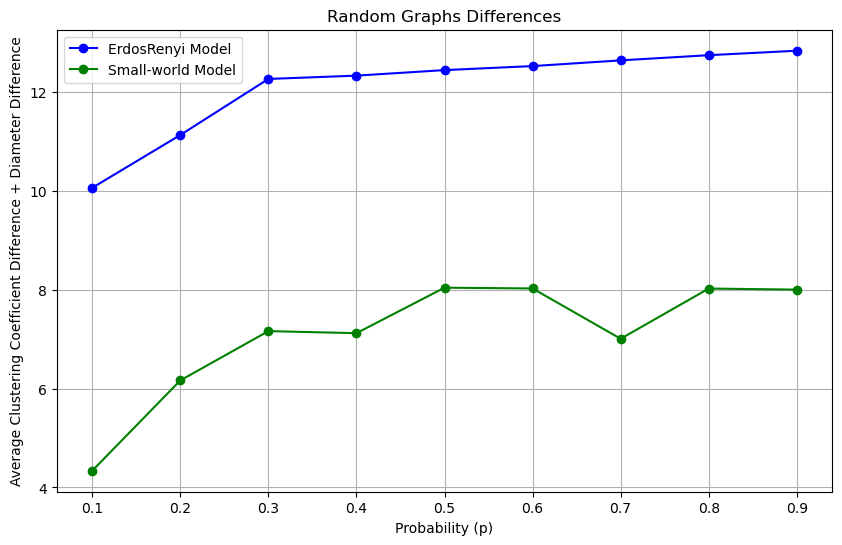

Best match value: 0.1
Lowest difference: 4.3389124007919735
Best average clustering coefficient difference: 0.3389124007919736
Best diameter difference: 4


In [11]:
def generate_random_graph(graph):
    probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    G_diameter, G_avg_cc = calculate_metrics(graph, to_print=False)
    er_total_differences = []
    sw_total_differences = []
    # Experiment with Erdos Renyi model
    er_lowest_difference = float('inf')
    er_best_probability = None
    er_best_avg_cc_difference = None
    er_best_diameter_difference = None
    for p in probabilities:
        er_graph = nx.erdos_renyi_graph(len(graph), p)
        er_diameter, er_avg_cc = calculate_metrics(er_graph, to_print=False)
        er_diameter_difference = abs(er_diameter - G_diameter)
        er_avg_cc_difference = abs(er_avg_cc - G_avg_cc)
        er_total_difference = er_avg_cc_difference + er_diameter_difference
        er_total_differences.append(er_total_difference)
        if er_total_difference < er_lowest_difference:
            er_best_probability = p
            er_lowest_difference = er_total_difference
            er_best_avg_cc_difference = er_avg_cc_difference
            er_best_diameter_difference = er_diameter_difference
    print(f"Best match value: {er_best_probability}")
    print(f"Lowest difference: {er_lowest_difference}")
    print(f"Best average clustering coefficient difference: {er_best_avg_cc_difference}")
    print(f"Best diameter difference: {er_best_diameter_difference}")
    # Experiment with Small World model
    sw_lowest_difference = float('inf')
    sw_best_probability = None
    sw_best_avg_cc_difference = None
    sw_best_diameter_difference = None
    for p in probabilities:
        sw_graph = nx.watts_strogatz_graph(len(graph), 4, p)
        sw_diameter, sw_avg_cc = calculate_metrics(sw_graph, to_print=False)
        sw_diameter_difference = abs(sw_diameter - G_diameter)
        sw_avg_cc_difference = abs(sw_avg_cc - G_avg_cc)
        sw_total_difference = sw_avg_cc_difference + sw_diameter_difference
        sw_total_differences.append(sw_total_difference)
        if sw_total_difference < sw_lowest_difference:
            sw_best_probability = p
            sw_lowest_difference = sw_total_difference
            sw_best_avg_cc_difference = sw_avg_cc_difference
            sw_best_diameter_difference = sw_diameter_difference
    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.plot(probabilities, er_total_differences, marker='o', linestyle="-", color="blue", label="ErdosRenyi Model")
    plt.plot(probabilities, sw_total_differences, marker='o', linestyle="-", color="green", label="Small-world Model")
    plt.title("Random Graphs Differences")
    plt.xlabel("Probability (p)")
    plt.ylabel("Average Clustering Coefficient Difference + Diameter Difference")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Best match value: {sw_best_probability}")
    print(f"Lowest difference: {sw_lowest_difference}")
    print(f"Best average clustering coefficient difference: {sw_best_avg_cc_difference}")
    print(f"Best diameter difference: {sw_best_diameter_difference}")
generate_random_graph(lesmis_graph)